In [2]:
#!pip install pandas 
#!pip install matplotlib
#!pip install scipy
#!pip install pandas seaborn matplotlib
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

import pandas as pd 
import  numpy as np
dist_file_1="/home/sophie/uncertain-identity-aware-tracking/deeplabcut/pig_tracking_dataset/evaluation-results/iteration-1/CDPQ_testFeb22-trainset90shuffle1/dist_200000.csv"
dist_file_2="/home/sophie/uncertain-identity-aware-tracking/deeplabcut/pig_tracking_dataset/evaluation-results/iteration-3/CDPQ_testFeb22-trainset90shuffle1/dist_130000.csv"
dist_file_3="/home/sophie/uncertain-identity-aware-tracking/deeplabcut/pig_tracking_dataset/evaluation-results/iteration-0/CDPQ_testFeb22-trainset90shuffle1/dist_130000.csv"


df_read_1 = pd.read_csv(dist_file_1, header=[0, 1, 2, 3], index_col=0)
df_read_2 = pd.read_csv(dist_file_2, header=[0, 1, 2, 3], index_col=0)
df_read_3 = pd.read_csv(dist_file_3, header=[0, 1, 2, 3], index_col=0)
df_read_1.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       778, 779, 780, 781, 782, 783, 784, 785, 786, 787],
      dtype='int64', length=788)

Reading the rmse  and plotting the distribution


Columns with 'rmse' at the last level:
23114 4.465989578128402 23114


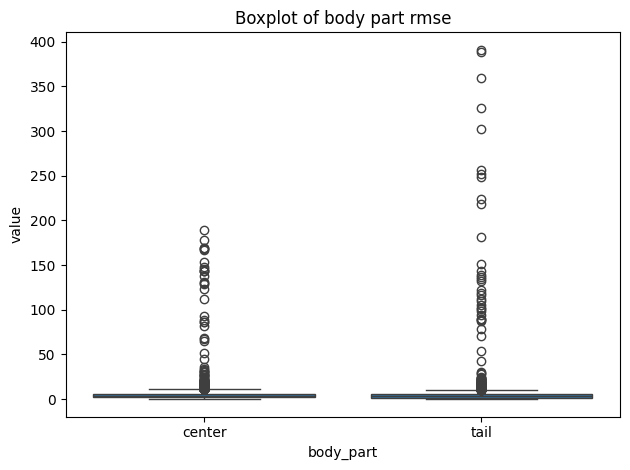

frames                                                             393.500000
count_unique_individuals_with_body_part_above_10                     6.351523
total_individuals                                                   14.998731
percentage_unique_individuals_with_body_part_above_10_per_frame     42.350133
percentage_point_taken_from_neighbor_10                             28.880566
dtype: float64
frames                                                             393.500000
count_unique_individuals_with_body_part_above_10                     1.676396
total_individuals                                                   14.998731
percentage_unique_individuals_with_body_part_above_10_per_frame     11.177182
percentage_point_taken_from_neighbor_10                              6.018089
dtype: float64
frames                                                             393.500000
count_unique_individuals_with_body_part_above_10                     0.050761
total_individuals                 

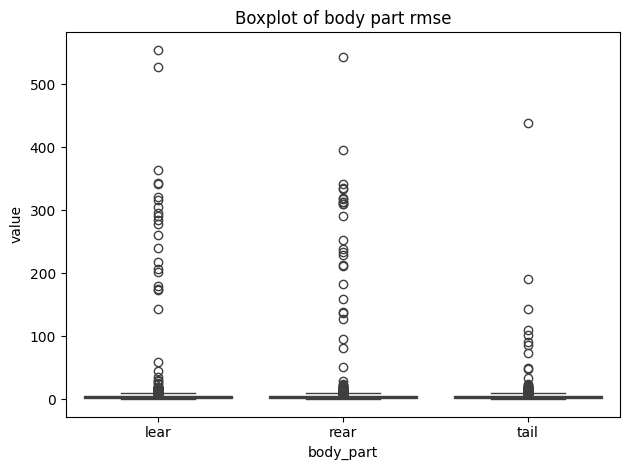

frames                                                             393.500000
count_unique_individuals_with_body_part_above_10                     7.539340
total_individuals                                                   14.944162
percentage_unique_individuals_with_body_part_above_10_per_frame     50.445743
percentage_point_taken_from_neighbor_10                             26.296182
dtype: float64
frames                                                             393.500000
count_unique_individuals_with_body_part_above_10                     0.691624
total_individuals                                                   14.944162
percentage_unique_individuals_with_body_part_above_10_per_frame      4.634490
percentage_point_taken_from_neighbor_10                              1.971813
dtype: float64
frames                                                             393.500000
count_unique_individuals_with_body_part_above_10                     0.062183
total_individuals                 

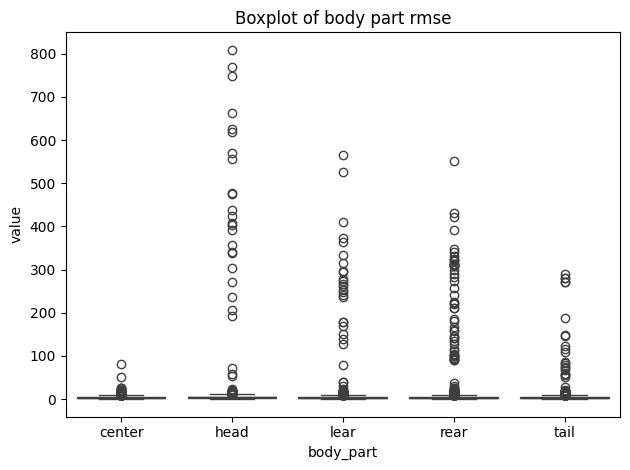

frames                                                             393.500000
count_unique_individuals_with_body_part_above_10                     9.461929
total_individuals                                                   15.000000
percentage_unique_individuals_with_body_part_above_10_per_frame     63.079526
percentage_point_taken_from_neighbor_10                             26.213047
dtype: float64
frames                                                             393.500000
count_unique_individuals_with_body_part_above_10                     1.137056
total_individuals                                                   15.000000
percentage_unique_individuals_with_body_part_above_10_per_frame      7.580372
percentage_point_taken_from_neighbor_10                              2.244121
dtype: float64
frames                                                             393.500000
count_unique_individuals_with_body_part_above_10                     0.124365
total_individuals                 

In [32]:


def generate_arrays(df_read):
    # Step 2: Select all columns with 'rmse' at the last level
    rmse_columns = df_read.loc[:, pd.IndexSlice[:, :, :, 'rmse']]
    all_rmse=[]
    body_part=[]
    individuals=[]
    frames=[]
    for col in rmse_columns.columns:
        all_rmse= all_rmse+list(rmse_columns[col])
        body_part=body_part+[col[-2] for a in list(rmse_columns[col])]
        individuals=individuals+[col[-3] for a in list(rmse_columns[col])]
        frames=frames+list(df_read.index)
    # Print the selected columns
    print("\nColumns with 'rmse' at the last level:")
    def to_float(value):
        try:
            return float(value)
        except (ValueError, TypeError):
            return np.nan

    all_rmse = [to_float(a) for a in all_rmse ]
    all_rmse = np.array(all_rmse, dtype=float)
    body_part=np.array(body_part)
    individuals=np.array(individuals)
    frames=np.array(frames)
    body_part=body_part[~np.isnan(all_rmse)]
    individuals=individuals[~np.isnan(all_rmse)]
    frames=frames[~np.isnan(all_rmse)]

    all_rmse = all_rmse[~np.isnan(all_rmse)]
    print(len(all_rmse), np.mean(all_rmse), len(body_part))
    data= {'value':all_rmse, "body_part":body_part, "individuals":individuals, "frames":frames}
    df=pd.DataFrame(data)
    
    df["log_rmse"]=np.log(df["value"])
    
    
    
    '''fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Boxplot
    sns.boxplot(x='body_part', y='log_rmse', data=df, ax=axes[0])
    axes[0].set_title('Boxplot of body part rmse')

    """# Density Plot
    sns.kdeplot(data=df, x='value', hue='body_part', fill=True, ax=axes[1] )
    axes[1].set_title('Density of body part rmse')
    """
    # Histogram
    sns.boxplot(y='log_rmse', data=df, ax=axes[1])
    axes[1].set_title('Boxplot of  rmse')
    
    """sns.histplot(data=df, x='value', hue='body_part', multiple='stack', ax=axes[1], bins=400, stat="percent", kde=True)#, kde=True)
    axes[1].set_title('Histogram of body part rmse in percentage')"""

    plt.tight_layout()
    plt.show()'''
    
    # Define the bin edges
    '''bin_edges = [0, 5,1000,  np.inf]  # Example bin edges, adjust as needed

    # Plot histogram
    sns.histplot(data=df, x='value' ,bins=bin_edges, stat="percent", kde=False)

    # Set plot labels
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Custom Histogram with Seaborn')
    '''
    # Show plot
    #plt.show()
    
    
    # Boxplot
    sns.boxplot(x='body_part', y='value', data=df)
    plt.title('Boxplot of body part rmse')

    # Histogram
    """sns.boxplot(y='value', data=df, ax=axes[1])
    axes[1].set_title('Boxplot of  rmse')"""
    
    """sns.histplot(data=df, x='value', hue='body_part', multiple='stack', ax=axes[1], bins=400, stat="percent", kde=True)#, kde=True)
    axes[1].set_title('Histogram of body part rmse in percentage')"""

    plt.tight_layout()
    plt.show()
    #rmse full:6.54, rmse center-tail:2.93, rmse 2 ears head:7.06


    def eval(threshold):
        df['value_above_100'] = df['value'] > threshold

        # Group by frames and calculate the number of unique individuals with value > 100
        frames_grouped = df.groupby('frames').apply(lambda x: x[x['value_above_100']]['individuals'].nunique())
        df_filtered =df[df['value_above_100'] ]
        total_points_taken_from_neighbor=  df.groupby('frames').apply(lambda x: x[x['value_above_100']]['individuals'] .count())

        frames_grouped_all_far_point_per_frame=  df.groupby('frames').apply(lambda x: x[x['value_above_100']]['individuals'])
        # Calculate the total number of unique individuals per frame
        total_individuals_per_frame = df.groupby('frames')['individuals'].nunique()
        total_points_per_frame = df.groupby('frames')['individuals'].count()
        # Calculate the percentage
        percentage_individuals_above_100 = (frames_grouped / total_individuals_per_frame) *100

        percentage_points_in_neighbor = (total_points_taken_from_neighbor / total_points_per_frame) *100
        #print(total_points_taken_from_neighbor)
        #print(total_points_per_frame)

        # Combine results into a DataFrame
        result_df = pd.DataFrame({
            'count_unique_individuals_with_body_part_above_10': frames_grouped,
            'total_individuals': total_individuals_per_frame,
            'percentage_unique_individuals_with_body_part_above_10_per_frame': percentage_individuals_above_100,
            'percentage_point_taken_from_neighbor_10': percentage_points_in_neighbor

        }).reset_index()

        print(result_df.mean())
        
    eval(5)
    eval(10)
    eval(100)


    return df


df= generate_arrays (df_read_1)
df= generate_arrays (df_read_2)
df= generate_arrays (df_read_3)



 number and percentage  of individuals having at least one bodypart far 

In [4]:
df



,value,body_part,individuals,frames,log_rmse,value_above_100
0,8.475553,center,individual1,0,2.137186,False
1,9.350012,center,individual1,1,2.235378,False
2,2.966837,center,individual1,2,1.087496,False
3,6.539342,center,individual1,3,1.877837,False
4,3.723203,center,individual1,4,1.314584,False
...,...,...,...,...,...,...
43694,2.435652,tail,individual9,783,0.890214,False
43695,3.238586,tail,individual9,784,1.175137,False
43696,2.572708,tail,individual9,785,0.944959,False
43697,0.838935,tail,individual9,786,-0.175623,False


In [5]:
pd.set_option('display.max_rows', 20)
frames_grouped_all_far_point_per_frame=  df.groupby('frames').apply(lambda x: x[x['value_above_100']])

frames_grouped_all_far_point_per_frame

,,value,body_part,individuals,frames,log_rmse,value_above_100
frames,,,,,,,
18,33201,179.060463,lear,individual6,18,5.187724,True
24,7667,108.300188,tail,individual11,24,4.684907,True
25,16247,116.898057,tail,individual14,25,4.761302,True
26,929,526.668008,lear,individual1,26,6.266570,True
29,12022,177.905254,lear,individual13,29,5.181251,True
...,...,...,...,...,...,...,...
775,5654,279.453422,tail,individual10,775,5.632836,True
776,37633,270.834982,tail,individual7,776,5.601510,True
780,4900,313.810575,rear,individual10,780,5.748790,True


In [6]:
pd.set_option('display.max_rows', None)
frames_grouped = df.groupby('frames').apply(lambda x: x[x['value_above_100']]['individuals'].nunique())
frames_grouped

frames
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     1
25     1
26     1
27     0
28     0
29     2
30     0
31     0
32     0
33     0
34     1
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     1
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     1
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     1
86     2
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    1
101    0
102    0
103    0
104    0
105    0
106    0
107    1
108    0
109    0
110